<h1>1. Import Libraries</h1>

In [1]:
import psutil
import torch

# Kiểm tra RAM
ram = psutil.virtual_memory()
print(f'Total RAM: {ram.total / (1024 ** 3):.2f} GB')
print(f'Used RAM: {ram.used / (1024 ** 3):.2f} GB')

# Kiểm tra GPU (nếu có)
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'GPU Memory Allocated: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB')
else:
    print('No GPU available.')

Total RAM: 7.80 GB
Used RAM: 7.32 GB
No GPU available.


In [2]:
# Importing thư viện
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import random
import os
import gc



<h1>2. Lấy dữ liệu training</h1>

In [3]:
train_dir = "../ASD/AutismDataset/train"
test_dir = "../ASD/AutismDataset/test"

In [4]:
# Getting 'Autistic' and 'Non-Autistic' train images from respective file names of train data
train_non_autistic = []
train_autistic = []
for i in os.listdir(train_dir):
    if 'Non_Autistic' in ("../ASD/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("../ASD/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("../ASD/AutismDataset/train/{}".format(i)))
        
# Getting test images from test data file path
test_imgs = ["../ASD/AutismDataset/test/{}".format(i) for i in os.listdir(test_dir)]


# Concatenate 'Autistic'  and 'Non-Autistic' images and shuffle them as train_images
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

# Remove the lists to save space
del train_autistic
del train_non_autistic
gc.collect()

0

: 

In [ ]:
# Plot first 3 images from train_imgs
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

Như chúng ta có thể thấy ở đây, hình ảnh tập train có kích thước khác nhau.
Hình ảnh cần được thay đổi kích thước đồng đều trước khi đưa vào model

<h1>3. Tiền xử lí dữ liệu</h1>

In [5]:
# Set the dimensions for images
nrows = 240
ncolumns  = 240
channels = 3

# Hàmm đọc và xử lí ảnh. Hàm trả về X, y. X - danh sách ảnh đã resized, y - danh sách nhãn của ảnh 

def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

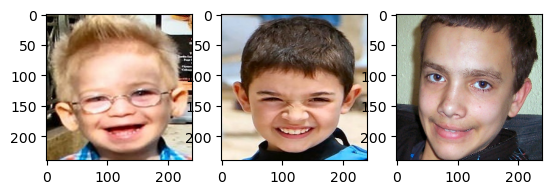

10453

In [6]:
# Get resized images and labels from train data
X_train, y_train = read_and_process_image(train_imgs)

import matplotlib.pyplot as plt

# Hiển thị ba ảnh đầu tiên trong X_train
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Tạo bố cục cho 3 ảnh
    plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))  # Chuyển đổi màu từ BGR sang RGB
    plt.axis('on')  # Tắt trục
plt.show()
    
#Delete train images to save space
del train_imgs
gc.collect()

In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([1270, 1270], dtype=int64))


<h3>Chuyển đổi các hình ảnh và nhãn đã thay đổi kích thước thành mảng numpy, trực quan hóa phân phối lớp cho ảnh tập train</h3>

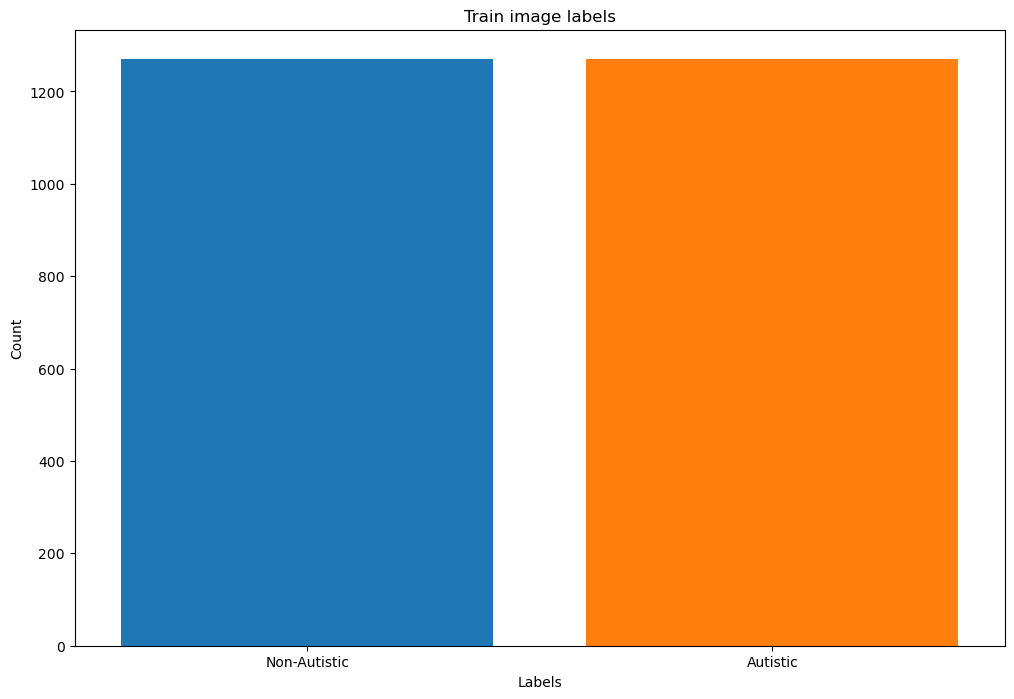

In [8]:
# Convert the lists to array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.countplot(x=y_train, saturation=1)
plt.title("Train image labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Autistic', 'Autistic'])  
plt.show()

In [9]:
# Shape of train images and labels
print("Shape of train images:", X_train.shape)
print("Shape of train labels:", y_train.shape)

Shape of train images: (2540, 240, 240, 3)
Shape of train labels: (2540,)


<h3>Lấy dữ liệu validation và tiền xử lí chúng. Tập validation data có tên là valid gồm 100 ảnh hoàn toàn mới (50 ảnh mỗi lớp)</h3>
<h3>Chúng ta sử dụng tập dữ liệu này để đánh giá mô hình.</h3>

In [10]:
val_autistic = "../ASD/AutismDataset/valid/Autistic"
val_non_autistic = "../ASD/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["../ASD/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["../ASD/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

# Remove the lists to save space
del val_autistic_imgs
del val_non_autistic_imgs
gc.collect()

2456

In [11]:
# Get resized images and labels from validation data
X_val, y_val = read_and_process_image(val_imgs)

# Delete validation images to save space
del val_imgs
gc.collect()

0

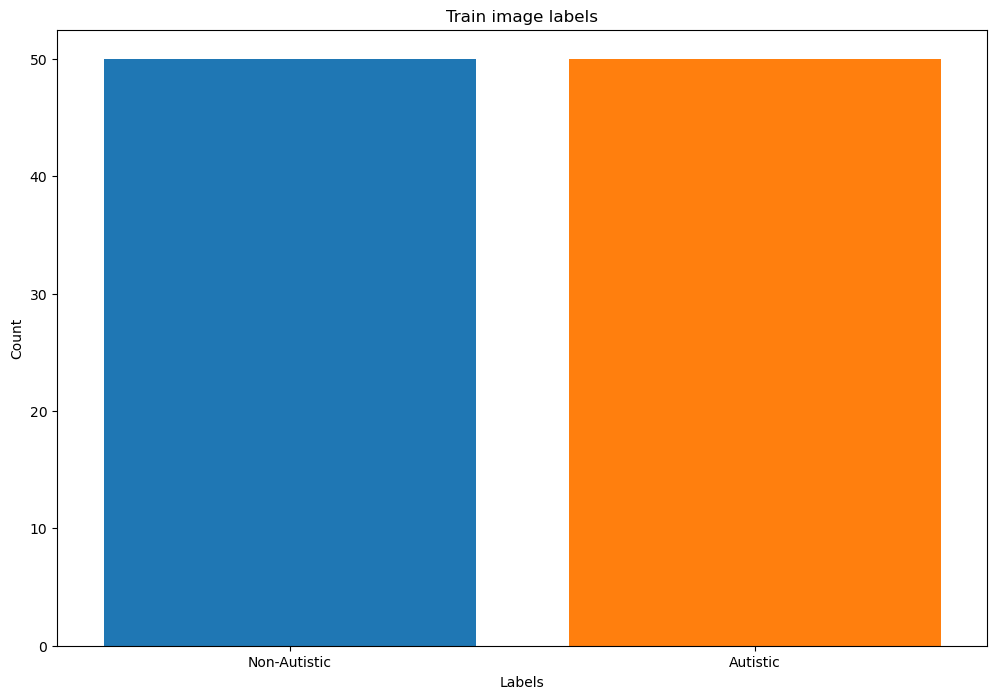

In [12]:
# Convert the lists to array
X_val = np.array(X_val)
y_val = np.array(y_val)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.countplot(x=y_val, saturation=1)
plt.title("Train image labels")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Autistic', 'Autistic'])  
plt.show()

In [13]:
# Shape of validation images and labels
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of validation images: (100, 240, 240, 3)
Shape of validation labels: (100,)


: 

<h1>4. Model training</h1>

In [ ]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms as T # for simplifying the transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models


In [ ]:
import timm
from timm.loss import LabelSmoothingCrossEntropy

In [ ]:
import sys
from tqdm import tqdm
import time
import copy